**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('/Users/karthik/Desktop/Datasets/SECOM-Dataset/uci-secom.csv')

In [3]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
df.shape

(1567, 592)

In [5]:
len(df.isnull().sum())

592

In [6]:
def percentage_missing(df):
    
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values() 
    
    return percent_nan

In [7]:
missing_values = percentage_missing(df)

In [8]:
missing_values

589     0.063816
179     0.063816
180     0.063816
181     0.063816
182     0.063816
         ...    
220    85.577537
293    91.193363
158    91.193363
157    91.193363
292    91.193363
Length: 538, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Lets breakdown the timestamp**

In [11]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['day_of_week'] = df['Time'].dt.dayofweek

In [13]:
df['year'].value_counts()

year
2008    1567
Name: count, dtype: int64

In [14]:
df['month'].value_counts()

month
8     471
9     413
10    123
7     114
2      98
6      67
5      62
1      51
3      50
4      49
11     35
12     34
Name: count, dtype: int64

In [15]:
df['day'].value_counts()

day
10    265
9     202
8     137
19     86
29     83
21     77
28     76
30     75
22     68
20     66
18     59
15     57
27     43
16     43
23     39
13     35
24     30
14     30
25     26
17     25
26     23
31     22
Name: count, dtype: int64

In [16]:
df['hour'].value_counts()

hour
15    99
20    79
14    77
23    75
5     74
7     73
21    71
3     70
11    68
12    67
4     65
0     65
8     64
19    63
18    63
6     62
2     60
16    58
17    58
22    56
9     55
10    53
13    50
1     42
Name: count, dtype: int64

In [17]:
df[['year', 'month', 'day', 'hour', 'minute']].describe()

,year,month,day,hour,minute
count,1567.0,1567.000000,1567.000000,1567.000000,1567.000000
mean,2008.0,7.409700,17.248883,11.780472,29.470325
std,0.0,2.554511,7.613716,6.880780,17.230137
min,2008.0,1.000000,8.000000,0.000000,0.000000
25%,2008.0,7.000000,10.000000,6.000000,15.000000
50%,2008.0,8.000000,17.000000,12.000000,29.000000
75%,2008.0,9.000000,23.000000,18.000000,45.000000
max,2008.0,12.000000,31.000000,23.000000,59.000000


In [18]:
df[['year', 'month', 'day', 'hour', 'minute']].isna().sum()

year      0
month     0
day       0
hour      0
minute    0
dtype: int64

**Checking the target Variable**

In [19]:
df['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

**Since the data has high cardinality in features, we can't perform manual analysis**

**Lets focus on EDA to gain insights**

**Checking the Distribution of the Timesetp**

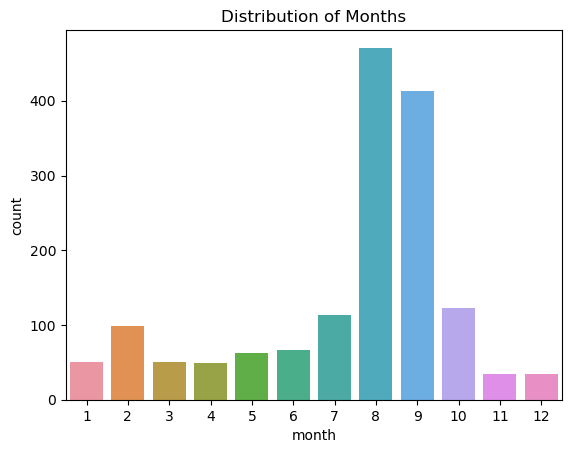

In [20]:
sns.countplot(x='month', data=df)
plt.title('Distribution of Months')
plt.show()

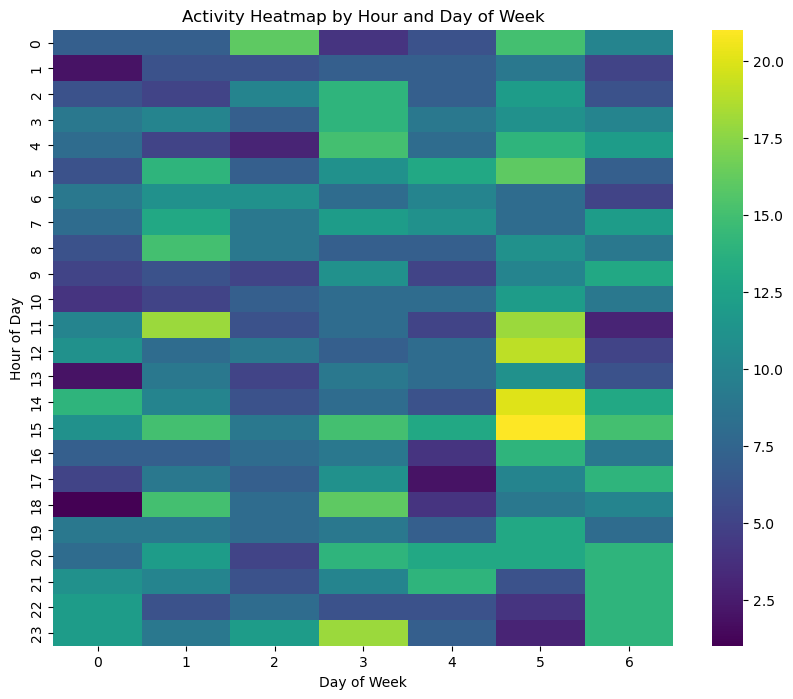

In [21]:
pivot_table = df.pivot_table(index='hour', columns='day_of_week', aggfunc='size')
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Activity Heatmap by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

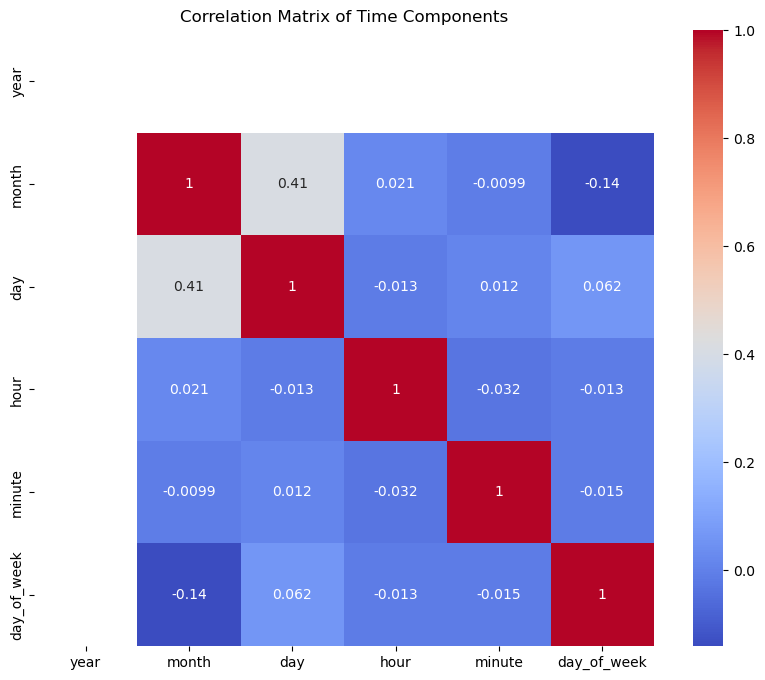

In [22]:
time_features = ['year', 'month', 'day', 'hour', 'minute', 'day_of_week']
correlation_matrix = df[time_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Time Components')
plt.show()

**Analysing the missing values**

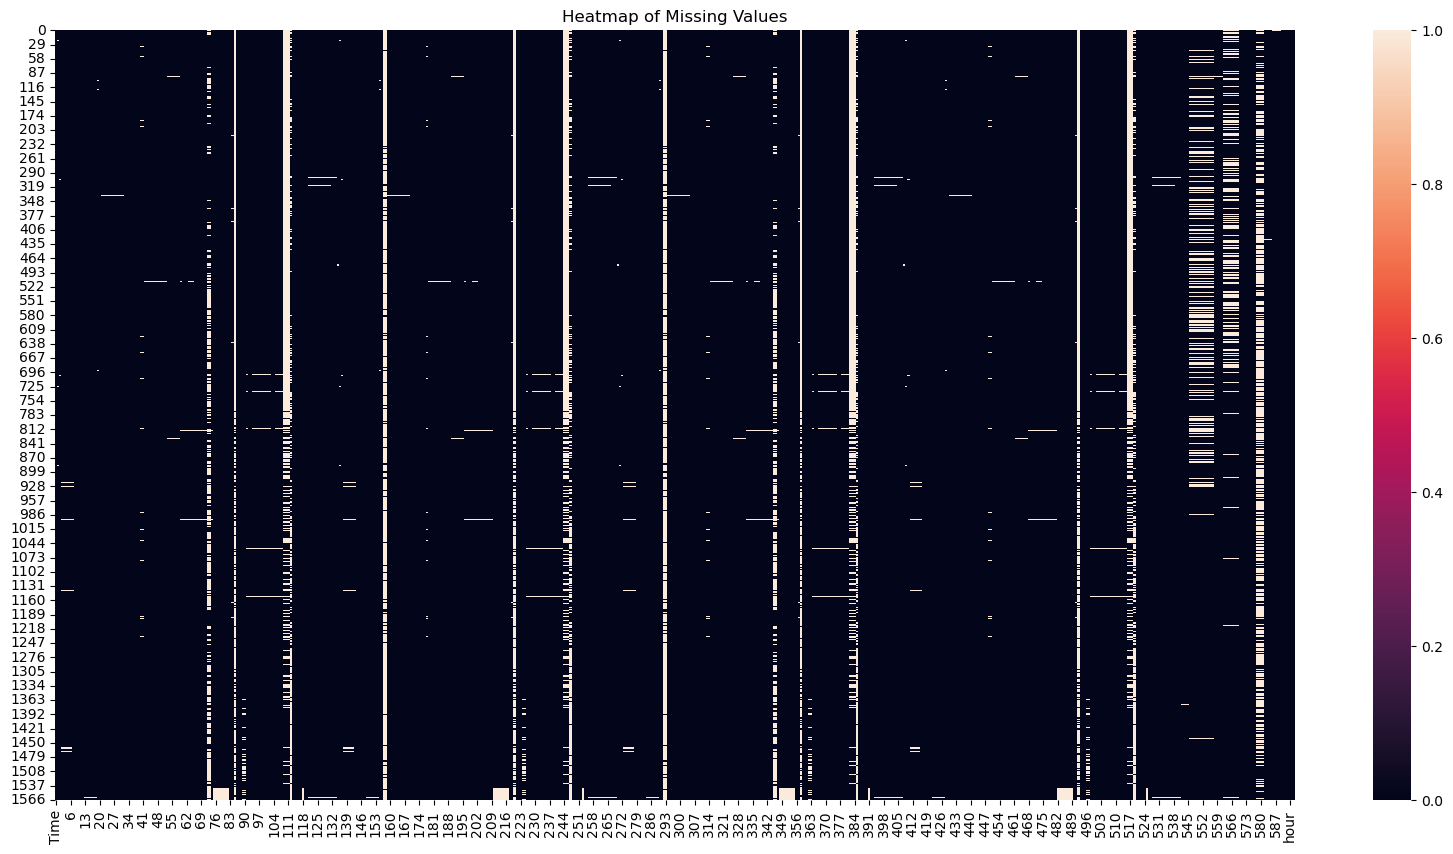

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())
plt.title('Heatmap of Missing Values')
plt.show()

"""

We can clearly see the patterns in the missing values. 

- Not all data values as patterns, but most of the values follow a certain patterns.

- We can see some ambiguous missing values at the end of the sensor. 

- Lets dive deeper into it. 

"""

In [24]:
s

Time            0
0               6
1               7
2              14
3              14
               ..
month           0
day             0
hour            0
minute          0
day_of_week     0
Length: 598, dtype: int64

In [25]:
df.isna().sum().sort_values(ascending=False)

292            1429
293            1429
158            1429
157            1429
85             1341
               ... 
386               0
361               0
360               0
359               0
day_of_week       0
Length: 598, dtype: int64

In [26]:
top_60 = df.isna().sum().sort_values(ascending=False).head(60)

In [27]:
top_60

292    1429
293    1429
158    1429
157    1429
85     1341
492    1341
220    1341
358    1341
382    1018
518    1018
110    1018
111    1018
516    1018
517    1018
109    1018
384    1018
383    1018
244    1018
245    1018
246    1018
580     949
579     949
581     949
578     949
345     794
73      794
72      794
346     794
247     715
112     715
385     715
519     715
563     273
566     273
569     273
564     273
565     273
567     273
562     273
568     273
557     260
556     260
555     260
550     260
553     260
552     260
546     260
547     260
548     260
549     260
551     260
554     260
90       51
89       51
496      51
362      51
224      51
497      51
363      51
225      51
dtype: int64

**As we can see all the columns are grouped when values are not collected from the sensor**

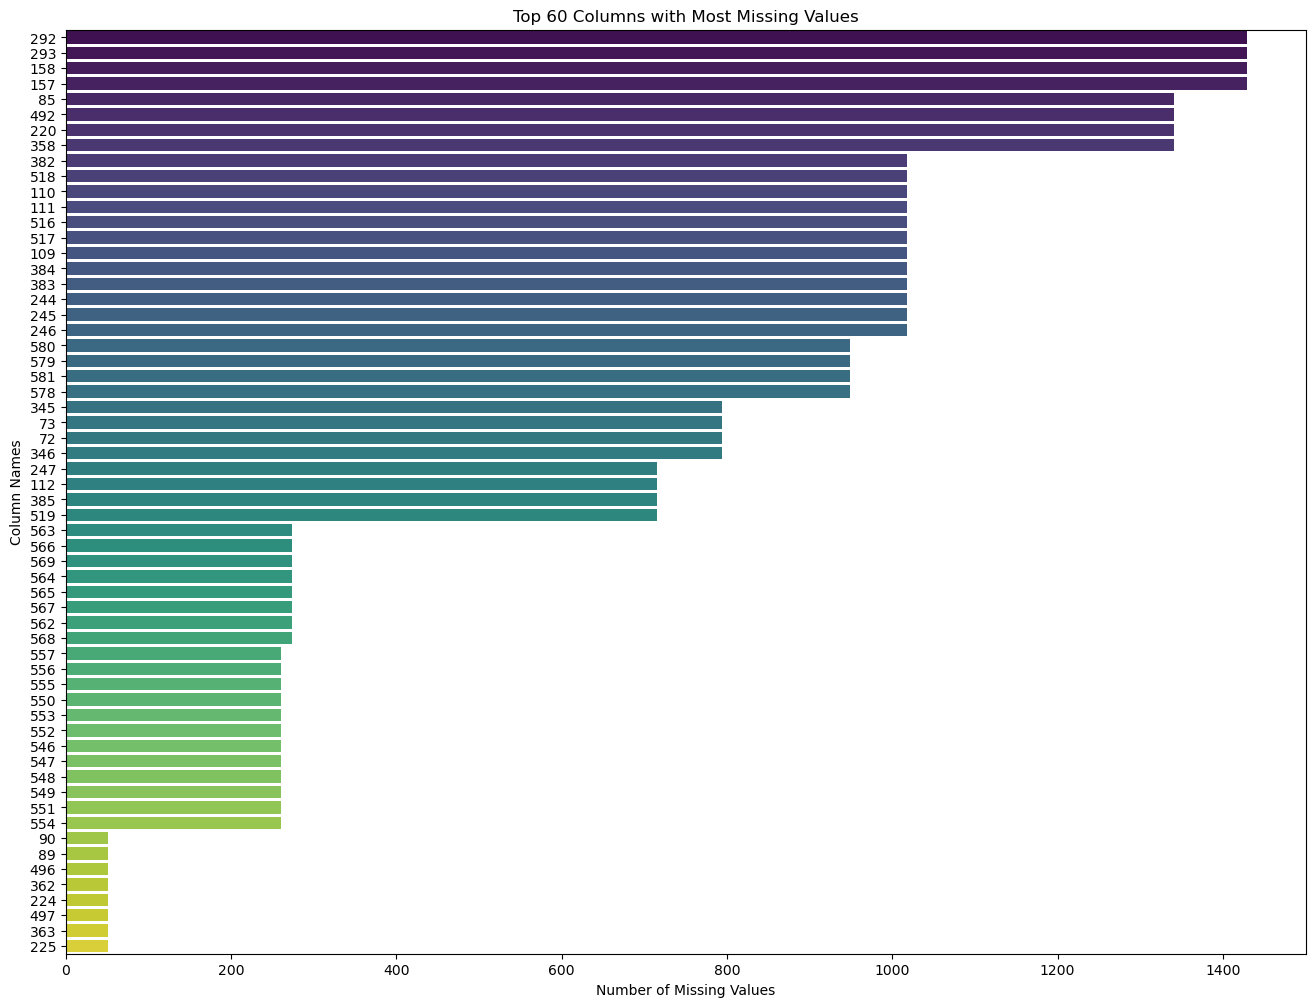

In [28]:
plt.figure(figsize=(16, 12))
sns.barplot(x=top_60.values, y=top_60.index, palette="viridis")
plt.title('Top 60 Columns with Most Missing Values')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column Names')
plt.show()

**Lets Analyse the Target Variable (Pass/Fail)**

In [29]:
df['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

<Axes: xlabel='Pass/Fail', ylabel='count'>

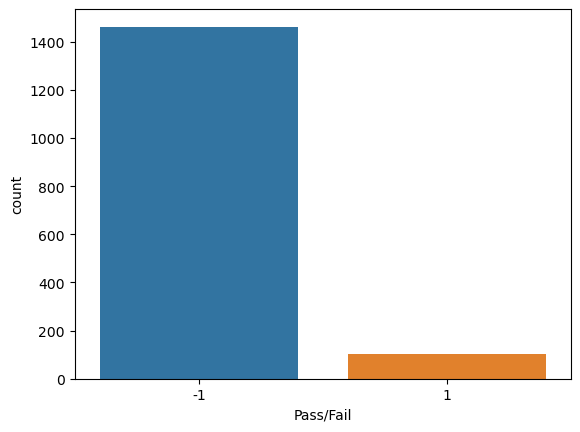

In [30]:
sns.countplot(data=df, x='Pass/Fail')

In [31]:
target_variable = 'Pass/Fail'

In [32]:
top_100 = df.isna().sum().sort_values(ascending=False).head(100)

In [33]:
top_50_missing = df.isna().sum().sort_values(ascending=False).head(50)

In [34]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,587,588,589,Pass/Fail,year,month,day,hour,minute,day_of_week
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,NaN,-1,2008,7,19,11,55,5
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0201,0.0060,208.2045,-1,2008,7,19,12,32,5
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0484,0.0148,82.8602,1,2008,7,19,13,17,5
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0149,0.0044,73.8432,-1,2008,7,19,14,43,5
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0149,0.0044,73.8432,-1,2008,7,19,15,22,5


In [35]:
df['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [36]:
df['Pass/Fail'] = df['Pass/Fail'].replace(-1,0)

In [37]:
df['Pass/Fail'].value_counts()

Pass/Fail
0    1463
1     104
Name: count, dtype: int64

In [38]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,587,588,589,Pass/Fail,year,month,day,hour,minute,day_of_week
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,NaN,0,2008,7,19,11,55,5
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0201,0.0060,208.2045,0,2008,7,19,12,32,5
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0484,0.0148,82.8602,1,2008,7,19,13,17,5
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0149,0.0044,73.8432,0,2008,7,19,14,43,5
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0149,0.0044,73.8432,0,2008,7,19,15,22,5
